# Step 1: Load the MNIST Dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Load data and normalize
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

# Flatten images
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))


# Step 2: Define Autoencoder Function

In [5]:
def build_autoencoder(latent_dim):
    input_img = Input(shape=(784,))
    encoded = Dense(latent_dim, activation='relu')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)

    autoencoder = Model(input_img, decoded)
    return autoencoder


# Step 3: Compile and Train the Autoencoder

In [8]:
latent_dim = 32
autoencoder = build_autoencoder(latent_dim)

autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')
history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.3884 - val_loss: 0.1868
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1774 - val_loss: 0.1510
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1474 - val_loss: 0.1324
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1306 - val_loss: 0.1211
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1204 - val_loss: 0.1130
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1128 - val_loss: 0.1069
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1072 - val_loss: 0.1024
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1029 - val_loss: 0.0993
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0998 - val_loss: 0.0969
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0977 - val_loss: 0.0955
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0964 - val_loss: 0.0944
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

# Step 4: Plot Original vs Reconstructed Images

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


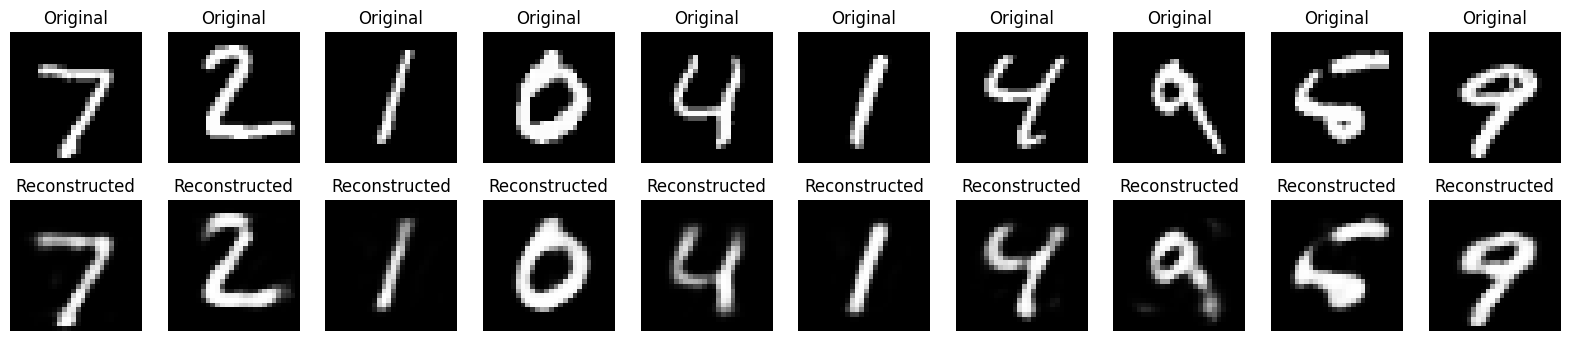

In [10]:
# Predict on test images
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()


# Step 5: Vary Latent Dimensions and Analyze


Training autoencoder with latent dim = 16
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


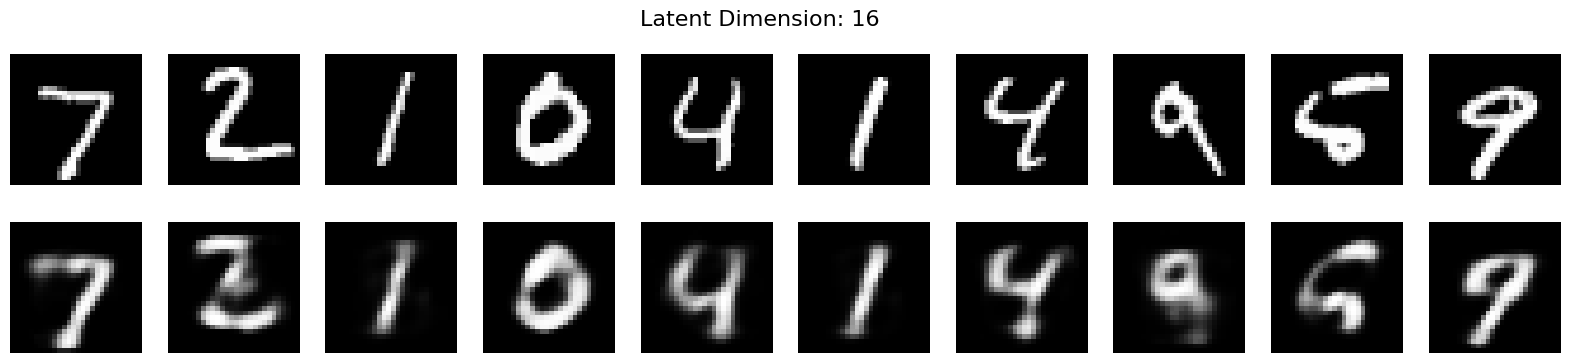


Training autoencoder with latent dim = 32
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


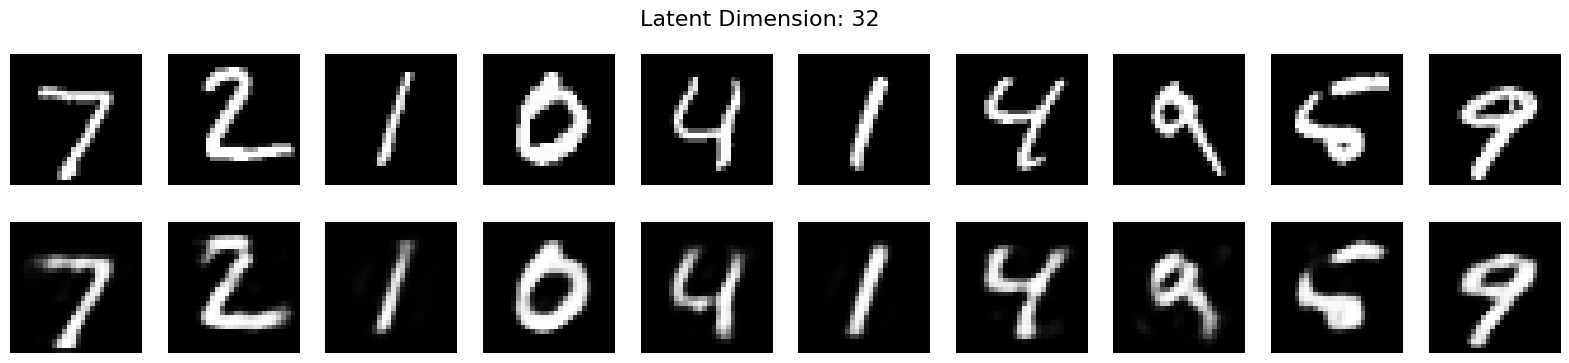


Training autoencoder with latent dim = 64
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


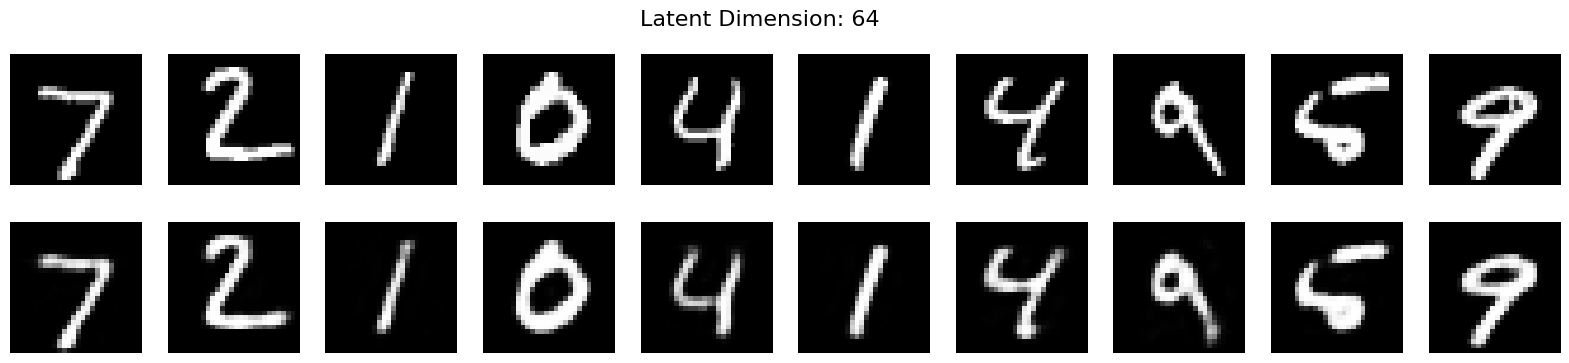

In [14]:
for latent_dim in [16, 32, 64]:
    print(f"\nTraining autoencoder with latent dim = {latent_dim}")
    autoencoder = build_autoencoder(latent_dim)
    autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')
    autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, verbose=0)
    decoded_imgs = autoencoder.predict(x_test)

    # Visualize
    plt.figure(figsize=(20, 4))
    for i in range(10):
        # Original
        ax = plt.subplot(2, 10, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
        plt.axis("off")

        # Reconstructed
        ax = plt.subplot(2, 10, i + 1 + 10)
        plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
        plt.axis("off")
    plt.suptitle(f"Latent Dimension: {latent_dim}", fontsize=16)
    plt.show()


🔍 Observation:
Smaller Latent Size (e.g., 16): Less detail, more blurry reconstructions.

Larger Latent Size (e.g., 64): Better reconstructions, but less compression.